# **Feature Matching**

Download the images for this notebook [here](https://github.com/tim3in/image-processing/tree/main/images/feature_matching).

## Import Libraries

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Example 1

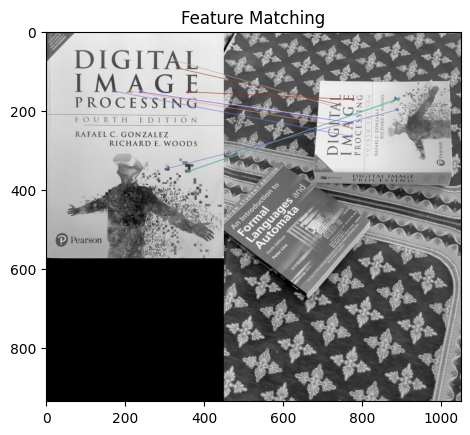

In [ ]:
# Load the two images
img1 = cv2.imread('object.jpg', cv2.IMREAD_GRAYSCALE)  # First image
img2 = cv2.imread('scene.jpg', cv2.IMREAD_GRAYSCALE)  # Second image

# Step 1: Detect ORB keypoints and descriptors in both images
orb = cv2.ORB_create()

# Find keypoints and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# Step 2: Create a Brute-Force matcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Step 3: Match descriptors between the two images
matches = bf.match(descriptors1, descriptors2)

# Step 4: Sort matches based on their distance (lower distance is better)
matches = sorted(matches, key=lambda x: x.distance)

# Step 5: Draw the top 10 matches
matched_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Step 6: Display the matched image
plt.imshow(matched_img)
plt.title("Feature Matching")
plt.show()


## Example 2

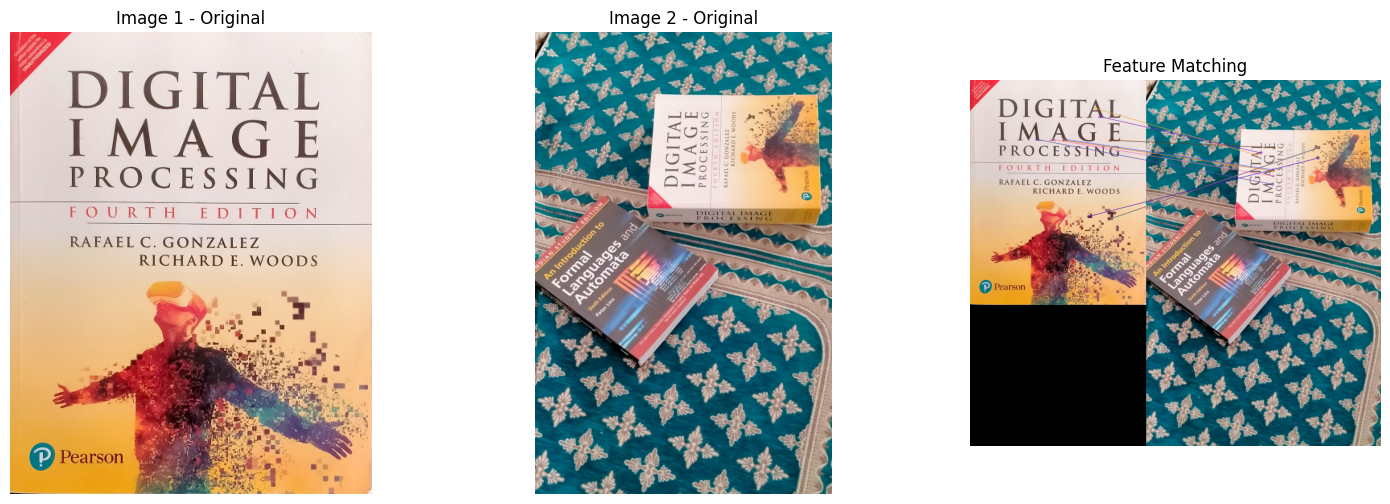

In [ ]:
# Load the two images
img1 = cv2.imread('object.jpg')  # First image
img2 = cv2.imread('scene.jpg')  # Second image

# Convert images to grayscale for feature detection
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Step 1: Detect ORB keypoints and descriptors in both grayscale images
orb = cv2.ORB_create()

# Find keypoints and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

# Step 2: Create a Brute-Force matcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Step 3: Match descriptors between the two images
matches = bf.match(descriptors1, descriptors2)

# Step 4: Sort matches based on their distance (lower distance is better)
matches = sorted(matches, key=lambda x: x.distance)

# Step 5: Draw the top 10 matches (in color)
matched_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Step 6: Display the original images and the matched image

# Create a plot with 3 subplots: original image1, original image2, and the matched output
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Show original image1
ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display in matplotlib
ax[0].set_title('Image 1 - Original')
ax[0].axis('off')

# Show original image2
ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display in matplotlib
ax[1].set_title('Image 2 - Original')
ax[1].axis('off')

# Show the image with matches
ax[2].imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display in matplotlib
ax[2].set_title('Feature Matching')
ax[2].axis('off')

# Display the plot
plt.show()


## Detecting Keypoints

### **Keypoint detection using SIFT**

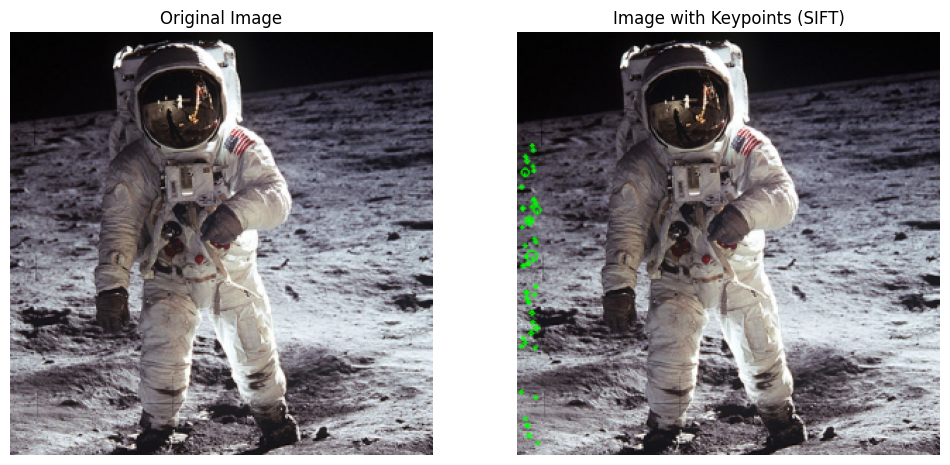

In [5]:
# Load an image in color
img = cv2.imread('astro.jpg')  # Replace 'astro.jpg' with the path to your image

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 1: Initialize the SIFT detector
sift = cv2.SIFT_create()

# Step 2: Detect keypoints
keypoints = sift.detect(gray, None)

# Step 3: Draw only a subset of keypoints (e.g., first 50 keypoints)
keypoints_subset = keypoints[:50]  # Take the first 50 keypoints

# Draw the selected keypoints on the original image
img_with_keypoints = cv2.drawKeypoints(img, keypoints_subset, None, color=(0, 255, 0), flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

# Step 4: Display the original image and the image with keypoints
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Show original image
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display in matplotlib
ax[0].set_title('Original Image')
ax[0].axis('off')

# Show image with keypoints
ax[1].imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
ax[1].set_title('Image with Keypoints (SIFT)')
ax[1].axis('off')

# Display the plot
plt.show()

### **Keypoint detection using FAST**

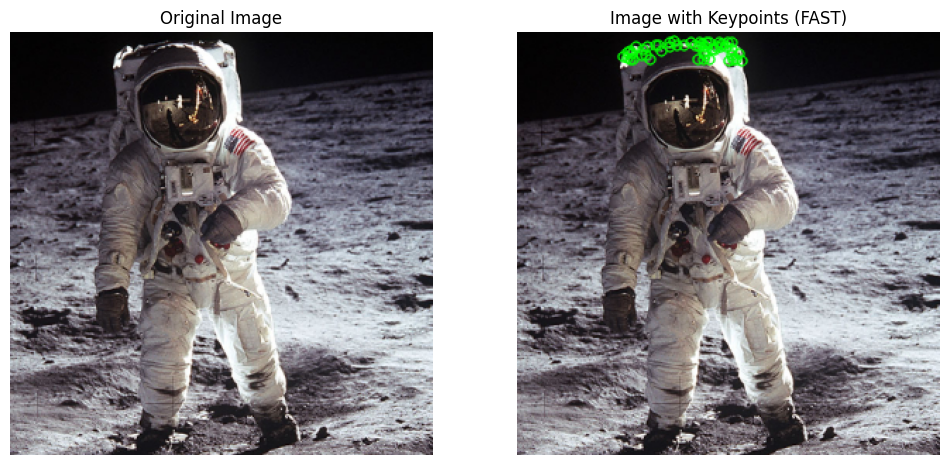

In [7]:
# Load an image in color
img = cv2.imread('astro.jpg')  # Replace 'astro.jpg' with the path to your image

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 1: Initialize the FAST detector
fast = cv2.FastFeatureDetector_create()

# Step 2: Detect keypoints
keypoints = fast.detect(gray, None)

# Step 3: Draw only a subset of keypoints (e.g., first 50 keypoints)
keypoints_subset = keypoints[:50]  # Take the first 50 keypoints

# Draw the selected keypoints on the original image
img_with_keypoints = cv2.drawKeypoints(img, keypoints_subset, None, color=(0, 255, 0), flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

# Step 4: Display the original image and the image with keypoints
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Show original image
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display in matplotlib
ax[0].set_title('Original Image')
ax[0].axis('off')

# Show image with keypoints
ax[1].imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
ax[1].set_title('Image with Keypoints (FAST)')
ax[1].axis('off')

# Display the plot
plt.show()

### **Keypoint detection using ORB**

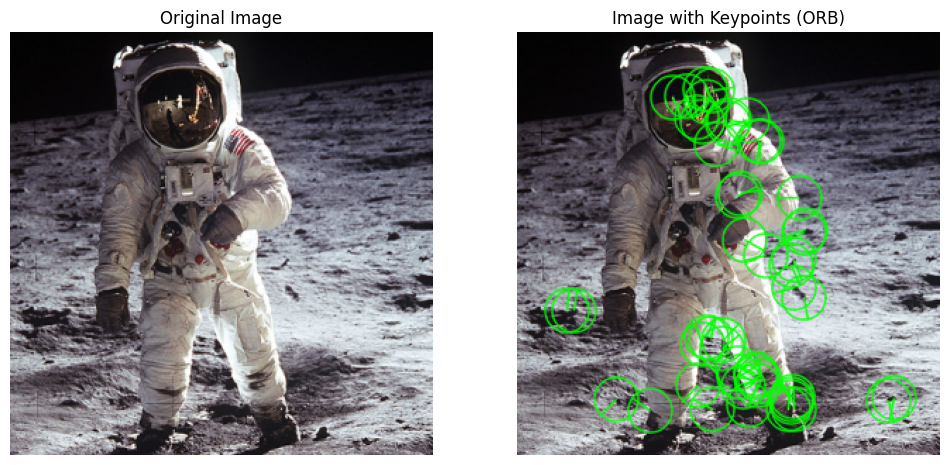

In [10]:
# Load an image in color
img = cv2.imread('astro.jpg')  # Replace 'astro.jpg' with the path to your image

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 1: Initialize the ORB detector
orb = cv2.ORB_create()

# Step 2: Detect keypoints
keypoints = orb.detect(gray, None)

# Step 3: Draw only a subset of keypoints (e.g., first 50 keypoints)
keypoints_subset = keypoints[:50]  # Take the first 50 keypoints

# Draw the selected keypoints on the original image
img_with_keypoints = cv2.drawKeypoints(img, keypoints_subset, None, color=(0, 255, 0), flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

# Step 4: Display the original image and the image with keypoints
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Show original image
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display in matplotlib
ax[0].set_title('Original Image')
ax[0].axis('off')

# Show image with keypoints
ax[1].imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
ax[1].set_title('Image with Keypoints (ORB)')
ax[1].axis('off')

# Display the plot
plt.show()

## Computing Descriptor

### **Computing descriptors using SIFT**

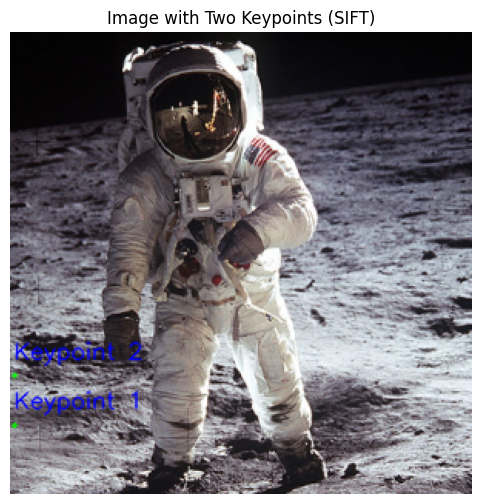

Descriptor for keypoint 1:
[ 29.  46.   8.   8.  46.  11.   2.  15. 124.  14.   1.   0.   1.   1.
   1.  56. 176.  10.   0.   0.   2.   5.  11. 176.  59.  19.   2.   1.
  12.  13.  22.  66.  72.  28.   5.   7.  89.  14.   5.  65. 151.  57.
  23.  36.   3.   1.   7.  54. 176.  69.   4.   1.  13.  12.   2.  54.
  60.  22.   4.   4.  89.  53.   5.  20.  30.  45.   9.   6.  72.  18.
   0.   4. 116.  29.  15.  26.   5.   7.   3.  16. 176.  12.   1.   1.
   6.   5.   1.  33.  47.   0.   0.   0.  54.  30.   2.  13.   1.   0.
   0.   0.   4.   1.   0.   0.   2.   0.   0.   0.   0.   0.   0.   0.
   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]

Descriptor for keypoint 2:
[ 55.  23.   2.   9.  60.  65.  17.  16. 115.  43.   3.   1.   3.   4.
   7.  23. 106. 134.   3.   0.   2.   4.   4.   5.  20.  60.  16.  18.
   7.   0.   1.   0.  57.  15.   2.   9. 130. 134.  19.  11. 134.  24.
   1.   1.  11.  41.  22.  43.  55. 117.   1.   3.  58.  53.   7.   6.
  55. 132.

In [ ]:
# Load an image
img = cv2.imread('astro.jpg')  # Replace 'astro.jpg' with the path to your image

# Convert the image to grayscale (SIFT works on grayscale images)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 1: Initialize the SIFT detector
sift = cv2.SIFT_create()

# Step 2: Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Step 3: Select two specific keypoints (first two keypoints as an example)
keypoints_subset = keypoints[:2]  # Take the first two keypoints
descriptors_subset = descriptors[:2]  # Take the corresponding descriptors

# Step 4: Draw the two selected keypoints on the original image
img_with_keypoints = cv2.drawKeypoints(img, keypoints_subset, None, color=(0, 255, 0), flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

# Step 5: Add labels to the keypoints on the image
# Loop over each keypoint and add a label at its location
for i, keypoint in enumerate(keypoints_subset):
    x, y = int(keypoint.pt[0]), int(keypoint.pt[1])  # Get the keypoint coordinates
    label = f"Keypoint {i + 1}"  # Create a label for each keypoint
    cv2.putText(img_with_keypoints, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

# Step 6: Display the image with the labeled keypoints
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Show image with keypoints and labels
ax.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
ax.set_title('Image with Two Keypoints (SIFT)')
ax.axis('off')

# Display the plot
plt.show()

# Step 7: Print the descriptors for the two selected keypoints
print(f"Descriptor for keypoint 1:\n{descriptors_subset[0]}")
print(f"\nDescriptor for keypoint 2:\n{descriptors_subset[1]}")

# Optionally, print the location, size, and angle of the keypoints for additional clarity
print(f"\nKeypoint 1: Location {keypoints_subset[0].pt}, Size {keypoints_subset[0].size}, Angle {keypoints_subset[0].angle}")
print(f"Keypoint 2: Location {keypoints_subset[1].pt}, Size {keypoints_subset[1].size}, Angle {keypoints_subset[1].angle}")

### **Computing descriptors using ORB**

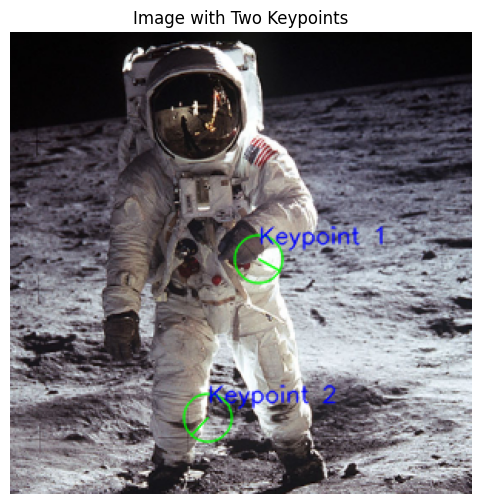

Descriptor for keypoint 1:
[180 124  27 188 122 195  31 226  62 174 240  57 247 255  33  80 251 253
  95 195 104 223 200 126 241 166  47 186  48 121  39 195]

Descriptor for keypoint 2:
[ 32 142 188 248 157 233  18 174 158  23 232   9 166 237  33  64 201 123
 163  16  58  40  66  63 235 231  16 123 208  72  20  42]

Keypoint 1: Location (161.0, 147.0), Size 31.0, Angle 29.038331985473633
Keypoint 2: Location (128.0, 250.0), Size 31.0, Angle 132.96502685546875


In [ ]:
# Convert the image to grayscale (ORB works on grayscale images)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 1: Initialize the ORB detector
orb = cv2.ORB_create()

# Step 2: Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(gray, None)

# Step 3: Select two specific keypoints (first two keypoints as an example)
keypoints_subset = keypoints[:2]  # Take the first two keypoints
descriptors_subset = descriptors[:2]  # Take the corresponding descriptors

# Step 4: Draw the two selected keypoints on the original image
img_with_keypoints = cv2.drawKeypoints(img, keypoints_subset, None, color=(0, 255, 0), flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

# Step 5: Add labels to the keypoints on the image
# Loop over each keypoint and add a label at its location
for i, keypoint in enumerate(keypoints_subset):
    x, y = int(keypoint.pt[0]), int(keypoint.pt[1])  # Get the keypoint coordinates
    label = f"Keypoint {i + 1}"  # Create a label for each keypoint
    cv2.putText(img_with_keypoints, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

# Step 6: Display the image with the labeled keypoints
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Show image with keypoints and labels
ax.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
ax.set_title('Image with Two Keypoints (ORB)')
ax.axis('off')

# Display the plot
plt.show()

# Step 7: Print the descriptors for the two selected keypoints
print(f"Descriptor for keypoint 1:\n{descriptors_subset[0]}")
print(f"\nDescriptor for keypoint 2:\n{descriptors_subset[1]}")

# Optionally, print the location, size, and angle of the keypoints for additional clarity
print(f"\nKeypoint 1: Location {keypoints_subset[0].pt}, Size {keypoints_subset[0].size}, Angle {keypoints_subset[0].angle}")
print(f"Keypoint 2: Location {keypoints_subset[1].pt}, Size {keypoints_subset[1].size}, Angle {keypoints_subset[1].angle}")


## Matching Descriptor

### **Matching descriptors using Brute-Force Matching**

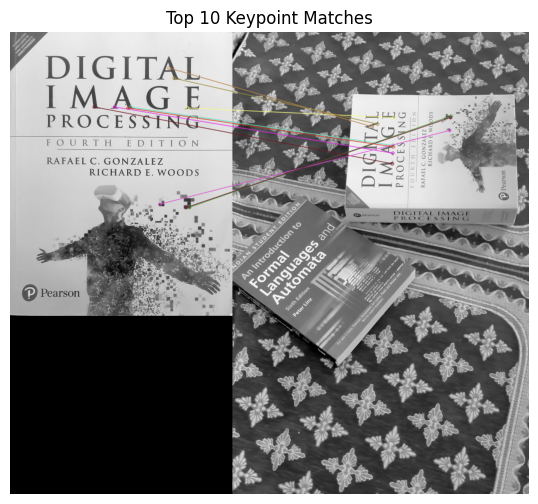

Best Match Keypoint from Image 1: (362.88006591796875, 354.5856628417969)
Best Match Keypoint from Image 2: (442.0, 170.0)

Descriptor for keypoint from Image 1:
[ 34 131   2 137 213 145 184  79  15   5  89 131 172 138 126 196 216  11
 131 149  22  58  64 213  60  20 138 111 148  14 189 134]

Descriptor for keypoint from Image 2:
[  2 131   0 137 213 145 184  15  14   5  90   3 172 138  62 196 216  11
 131 145  22 154  67 213  44  52 154 203 156  14 185 142]

Hamming distance between these two descriptors: 22.0


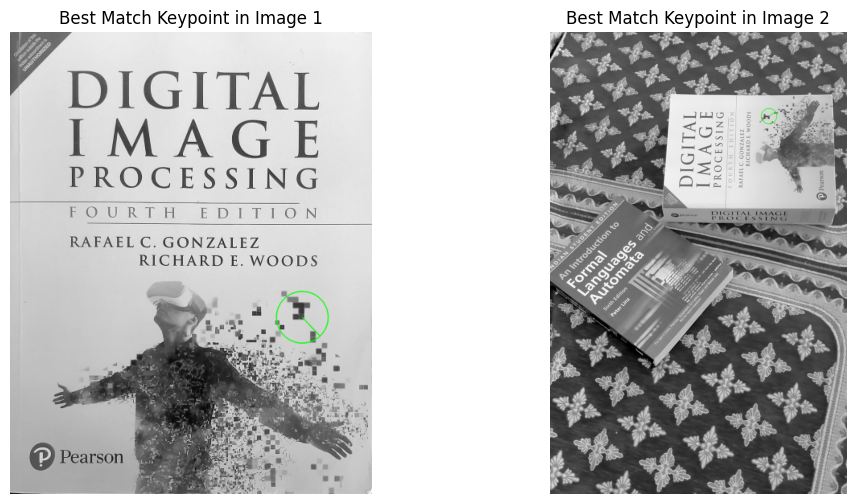

In [ ]:
# Load two images
img1 = cv2.imread('object.jpg', cv2.IMREAD_GRAYSCALE)  # First image
img2 = cv2.imread('scene.jpg', cv2.IMREAD_GRAYSCALE)  # Second image

# Step 1: Initialize the ORB detector
orb = cv2.ORB_create()

# Step 2: Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# Step 3: Use BFMatcher (Brute-Force Matcher) to match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)  # Hamming distance for ORB descriptors

# Step 4: Match descriptors between the two images
matches = bf.match(descriptors1, descriptors2)

# Step 5: Sort matches based on their distance (lower distance is better)
matches = sorted(matches, key=lambda x: x.distance)

# Step 6: Visualize the top 10 matches
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the result (Matched keypoints visualization)
plt.figure(figsize=(12, 6))
plt.imshow(img_matches)
plt.title('Top 10 Keypoint Matches')
plt.axis('off')
plt.show()

# Step 7: Visualize and explain the descriptor matching process
# Show detailed matching process for the first match
best_match = matches[0]

# Extract the keypoint index in both images
kp1_index = best_match.queryIdx
kp2_index = best_match.trainIdx

# Extract the descriptors for the matched keypoints
descriptor1 = descriptors1[kp1_index]
descriptor2 = descriptors2[kp2_index]

# Print keypoint locations and descriptor comparison
print(f"Best Match Keypoint from Image 1: {keypoints1[kp1_index].pt}")
print(f"Best Match Keypoint from Image 2: {keypoints2[kp2_index].pt}")

print("\nDescriptor for keypoint from Image 1:")
print(descriptor1)

print("\nDescriptor for keypoint from Image 2:")
print(descriptor2)

# Calculate and print the Hamming distance manually for better understanding
hamming_distance = matches[0].distance
print(f"\nHamming distance between these two descriptors: {hamming_distance}")

# Step 8: Visualize these two matched keypoints on the images
# Draw only the two keypoints being matched
img1_with_kp = cv2.drawKeypoints(img1, [keypoints1[kp1_index]], None, color=(0, 255, 0), flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
img2_with_kp = cv2.drawKeypoints(img2, [keypoints2[kp2_index]], None, color=(0, 255, 0), flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

# Plot the two keypoints separately for better visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img1_with_kp, cmap='gray')
ax[0].set_title('Best Match Keypoint in Image 1')
ax[0].axis('off')

ax[1].imshow(img2_with_kp, cmap='gray')
ax[1].set_title('Best Match Keypoint in Image 2')
ax[1].axis('off')

plt.show()

### **Matching descriptors using KNN (K-Nearest Neighbors)**

Descriptor 1's two nearest matches:
Match 1:
 - Keypoint in Image 1: (379.0, 192.0)
 - Keypoint in Image 2: (281.0, 191.0)
 - Distance: 69.0

Match 2:
 - Keypoint in Image 1: (379.0, 192.0)
 - Keypoint in Image 2: (262.08001708984375, 311.0400085449219)
 - Distance: 70.0



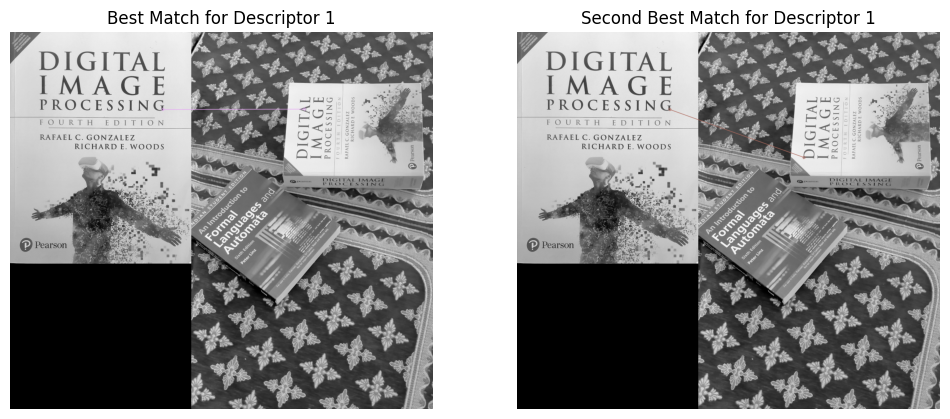

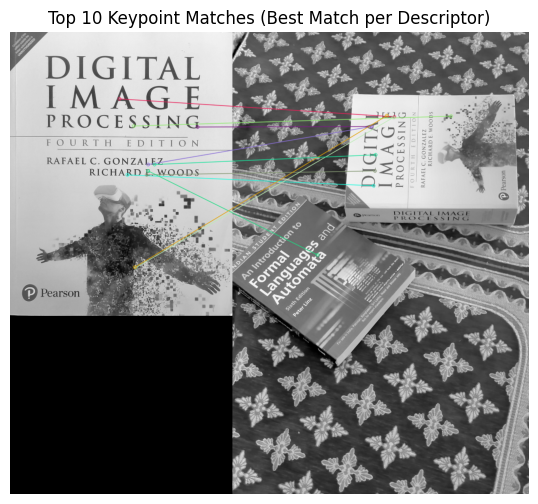

In [12]:
# Load two images
img1 = cv2.imread('object.jpg', cv2.IMREAD_GRAYSCALE)  # First image
img2 = cv2.imread('scene.jpg', cv2.IMREAD_GRAYSCALE)   # Second image

# Step 1: Initialize the ORB detector (you can also use SIFT by changing this to cv2.SIFT_create())
orb = cv2.ORB_create()

# Step 2: Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# Step 3: Use BFMatcher (Brute-Force Matcher) with KNN to match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING)  # For SIFT, use cv2.NORM_L2

# Step 4: Match descriptors between the two images using KNN (k=2 finds 2 nearest neighbors)
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Step 5: Prove that KNN returns multiple matches
# For demonstration, we will examine the first descriptor's matches

print("Descriptor 1's two nearest matches:")
for i, match in enumerate(matches[0]):  # matches[0] contains the two nearest matches for the first descriptor
    print(f"Match {i + 1}:")
    print(f" - Keypoint in Image 1: {keypoints1[match.queryIdx].pt}")
    print(f" - Keypoint in Image 2: {keypoints2[match.trainIdx].pt}")
    print(f" - Distance: {match.distance}\n")

# Step 6: Visualize both matches for the first descriptor
# We will draw the top 2 matches for the first descriptor

best_matches = [match[0] for match in matches]  # First match for each descriptor (top match)
second_best_matches = [match[1] for match in matches]  # Second match for each descriptor (second best match)

# Visualize the top 2 matches for the first descriptor
img_matches_best = cv2.drawMatches(img1, keypoints1, img2, keypoints2, [matches[0][0]], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches_second_best = cv2.drawMatches(img1, keypoints1, img2, keypoints2, [matches[0][1]], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the two matches (best and second best) for the first descriptor
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(img_matches_best)
ax[0].set_title('Best Match for Descriptor 1')
ax[0].axis('off')

ax[1].imshow(img_matches_second_best)
ax[1].set_title('Second Best Match for Descriptor 1')
ax[1].axis('off')

plt.show()

# Step 7: Optional - Visualize the top 10 best matches overall (ignoring the second match)
img_top_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, best_matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the result (Matched keypoints visualization)
plt.figure(figsize=(12, 6))
plt.imshow(img_top_matches)
plt.title('Top 10 Keypoint Matches (Best Match per Descriptor)')
plt.axis('off')
plt.show()

### **Matching descriptors using FLANN (Fast Library for Approximate Nearest Neighbors)**

### ***Matching descriptors using LSH***

Descriptor 1's two nearest matches:
Match 1:
 - Keypoint in Image 1: (379.0, 192.0)
 - Keypoint in Image 2: (326.4000244140625, 172.8000030517578)
 - Distance: 85.0

Match 2:
 - Keypoint in Image 1: (379.0, 192.0)
 - Keypoint in Image 2: (271.0, 211.0)
 - Distance: 93.0



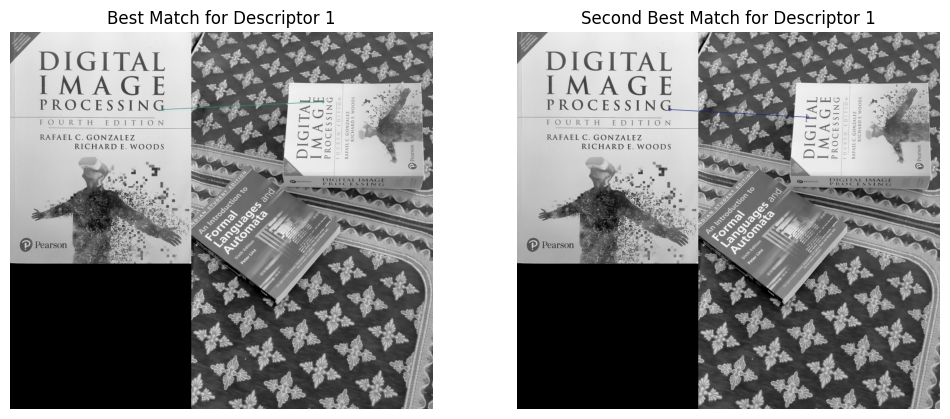

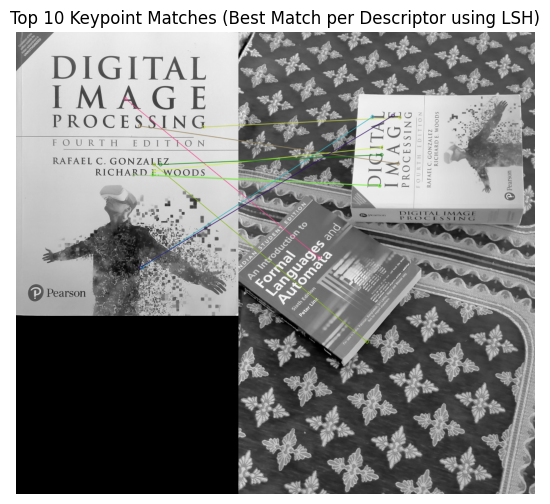

In [ ]:
# Load two images
img1 = cv2.imread('object.jpg', cv2.IMREAD_GRAYSCALE)  # First image
img2 = cv2.imread('scene.jpg', cv2.IMREAD_GRAYSCALE)   # Second image

# Step 1: Initialize the ORB
orb = cv2.ORB_create()

# Step 2: Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# Step 3: Use FLANN-based matcher for ORB descriptors
FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
search_params = dict(checks=50)

# Initialize FLANN-based matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Step 4: Match descriptors between the two images using KNN (k=2 for 2 nearest neighbors)
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Step 5: Check if there are enough matches
if matches and len(matches[0]) < 2:
    print("Not enough matches were found.")
else:
    # Step 6: Prove that KNN returns multiple matches
    print("Descriptor 1's two nearest matches:")
    for i, match in enumerate(matches[0]):  # matches[0] contains the two nearest matches for the first descriptor
        print(f"Match {i + 1}:")
        print(f" - Keypoint in Image 1: {keypoints1[match.queryIdx].pt}")
        print(f" - Keypoint in Image 2: {keypoints2[match.trainIdx].pt}")
        print(f" - Distance: {match.distance}\n")

    # Step 7: Visualize both matches for the first descriptor
    img_matches_best = cv2.drawMatches(img1, keypoints1, img2, keypoints2, [matches[0][0]], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    img_matches_second_best = cv2.drawMatches(img1, keypoints1, img2, keypoints2, [matches[0][1]], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the two matches (best and second best) for the first descriptor
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].imshow(img_matches_best)
    ax[0].set_title('Best Match for Descriptor 1')
    ax[0].axis('off')

    ax[1].imshow(img_matches_second_best)
    ax[1].set_title('Second Best Match for Descriptor 1')
    ax[1].axis('off')

    plt.show()

    # Step 8: Optional - Visualize the top 10 best matches overall (ignoring the second match)
    best_matches = [m[0] for m in matches if len(m) > 1]  # Ensure that each match has two neighbors
    img_top_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, best_matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the result (Matched keypoints visualization)
    plt.figure(figsize=(12, 6))
    plt.imshow(img_top_matches)
    plt.title('Top 10 Keypoint Matches (Best Match per Descriptor using LSH)')
    plt.axis('off')
    plt.show()

### ***Matching descriptors using KDTREE***

Descriptor 1's two nearest matches:
Match 1:
 - Keypoint in Image 1: (8.481678009033203, 67.98540496826172)
 - Keypoint in Image 2: (236.8671875, 183.97547912597656)
 - Distance: 140.38162231445312

Match 2:
 - Keypoint in Image 1: (8.481678009033203, 67.98540496826172)
 - Keypoint in Image 2: (226.91603088378906, 290.7277526855469)
 - Distance: 154.78048706054688



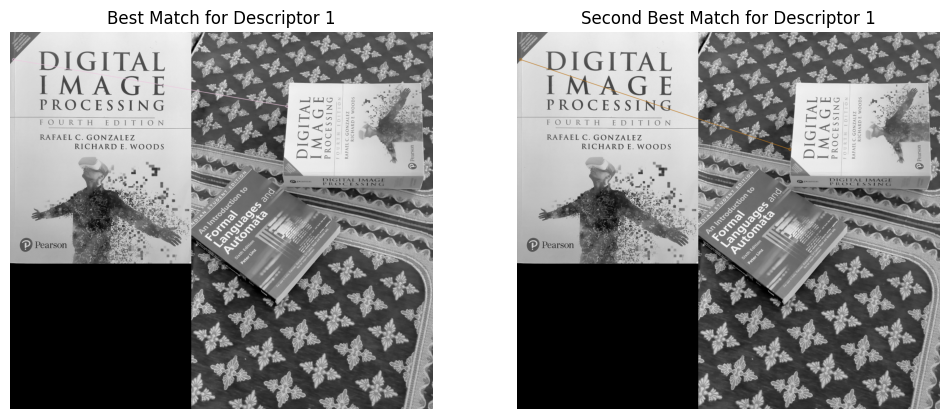

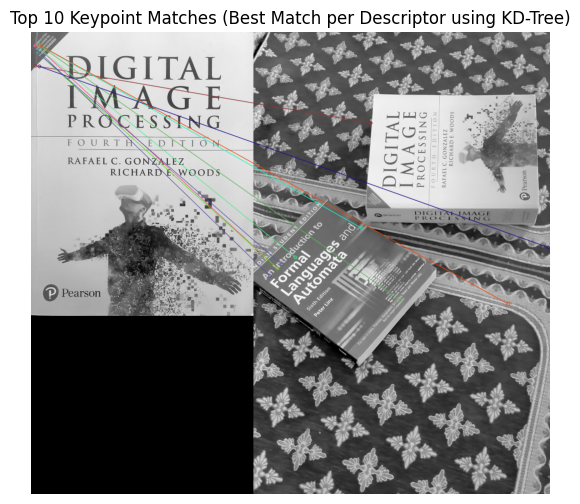

In [ ]:
# Load two images
img1 = cv2.imread('object.jpg', cv2.IMREAD_GRAYSCALE)  # First image
img2 = cv2.imread('scene.jpg', cv2.IMREAD_GRAYSCALE)   # Second image

# Step 1: Initialize the SIFT detector (for KD-Tree, we use SIFT or SURF)
sift = cv2.SIFT_create()

# Step 2: Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Step 3: Use FLANN-based matcher for SIFT descriptors (KD-Tree)
FLANN_INDEX_KDTREE = 1  # KD-Tree for SIFT (floating-point descriptors)
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)  # Parameters for KD-Tree
search_params = dict(checks=50)  # Number of recursive checks in the tree

# Initialize FLANN-based matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Step 4: Match descriptors between the two images using KNN (k=2 for 2 nearest neighbors)
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Step 5: Check if there are enough matches
if matches and len(matches[0]) < 2:
    print("Not enough matches were found.")
else:
    # Step 6: Prove that KNN returns multiple matches
    print("Descriptor 1's two nearest matches:")
    for i, match in enumerate(matches[0]):  # matches[0] contains the two nearest matches for the first descriptor
        print(f"Match {i + 1}:")
        print(f" - Keypoint in Image 1: {keypoints1[match.queryIdx].pt}")
        print(f" - Keypoint in Image 2: {keypoints2[match.trainIdx].pt}")
        print(f" - Distance: {match.distance}\n")

    # Step 7: Visualize both matches for the first descriptor
    img_matches_best = cv2.drawMatches(img1, keypoints1, img2, keypoints2, [matches[0][0]], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    img_matches_second_best = cv2.drawMatches(img1, keypoints1, img2, keypoints2, [matches[0][1]], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the two matches (best and second best) for the first descriptor
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].imshow(img_matches_best)
    ax[0].set_title('Best Match for Descriptor 1')
    ax[0].axis('off')

    ax[1].imshow(img_matches_second_best)
    ax[1].set_title('Second Best Match for Descriptor 1')
    ax[1].axis('off')

    plt.show()

    # Step 8: Optional - Visualize the top 10 best matches overall (ignoring the second match)
    best_matches = [m[0] for m in matches if len(m) > 1]  # Ensure that each match has two neighbors
    img_top_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, best_matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the result (Matched keypoints visualization)
    plt.figure(figsize=(12, 6))
    plt.imshow(img_top_matches)
    plt.title('Top 10 Keypoint Matches (Best Match per Descriptor using KD-Tree)')
    plt.axis('off')
    plt.show()

## Filtering Matches

### Lowe’s Ratio Test

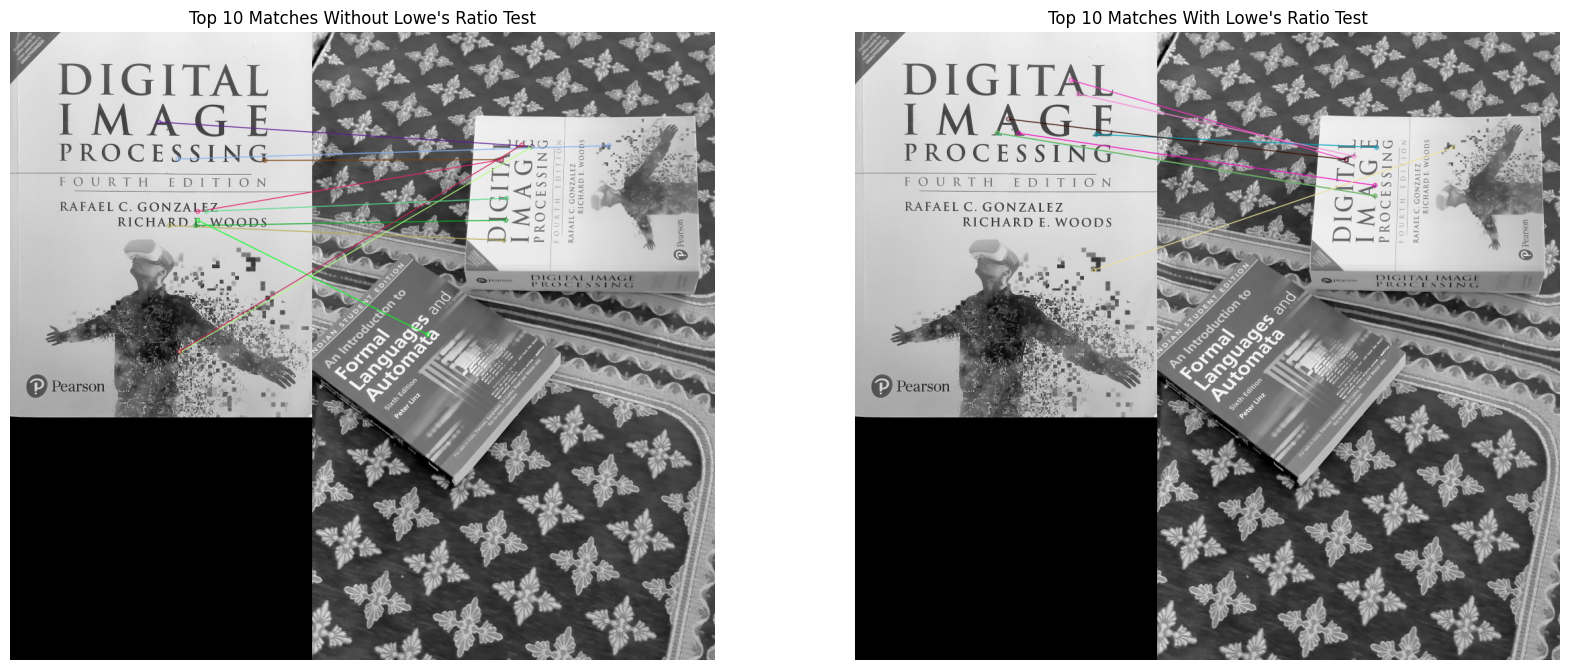

Total matches without Lowe's Ratio Test: 500
Total matches with Lowe's Ratio Test: 8


In [ ]:
# Load two images
img1 = cv2.imread('object.jpg', cv2.IMREAD_GRAYSCALE)  # First image
img2 = cv2.imread('scene.jpg', cv2.IMREAD_GRAYSCALE)  # Second image

# Step 1: Initialize the ORB detector
orb = cv2.ORB_create()

# Step 2: Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# Step 3: Initialize BFMatcher with Hamming distance
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

# Step 4: Use knnMatch to find the two best matches for each descriptor
matches = bf.knnMatch(descriptors1, descriptors2, k=2)  # k=2 to get the two best matches

# ===================== Without Lowe's Ratio Test =======================
# Step 5a: Without Lowe's Ratio Test, simply take the first match for each keypoint
matches_without_ratio = [m[0] for m in matches]  # Take the best match from each pair

# ===================== With Lowe's Ratio Test ==========================
# Step 5b: Apply Lowe's Ratio Test to filter out ambiguous matches
matches_with_ratio = []
for m, n in matches:
    if m.distance < 0.5 * n.distance:  # Lowe's ratio test
        matches_with_ratio.append(m)

# ===================== Visualization ===================================
# Step 6: Draw the matches for both approaches
img_matches_without_ratio = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches_without_ratio[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches_with_ratio = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches_with_ratio[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Step 7: Display the matches side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Without Lowe's Ratio Test
ax1.imshow(img_matches_without_ratio)
ax1.set_title(f'Top 10 Matches Without Lowe\'s Ratio Test')
ax1.axis('off')

# With Lowe's Ratio Test
ax2.imshow(img_matches_with_ratio)
ax2.set_title(f'Top 10 Matches With Lowe\'s Ratio Test')
ax2.axis('off')

plt.show()

# Step 8: Print the number of matches found for both approaches
print(f"Total matches without Lowe's Ratio Test: {len(matches_without_ratio)}")
print(f"Total matches with Lowe's Ratio Test: {len(matches_with_ratio)}")

## Use Case: Image-Based Search Using Feature Matching

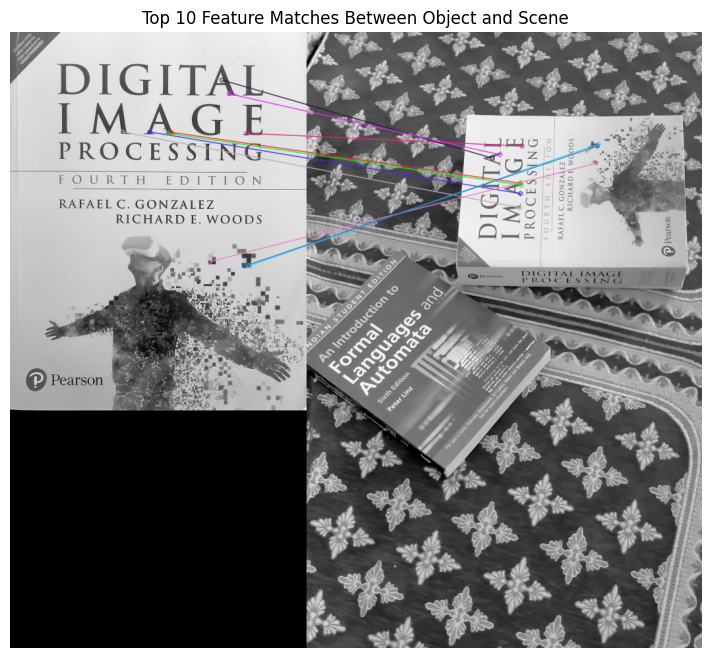

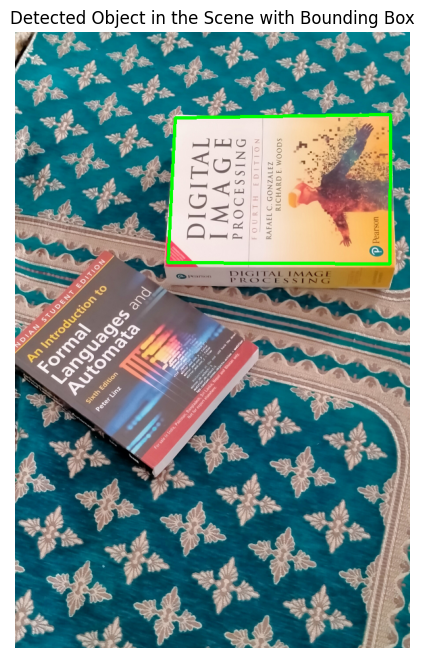

In [ ]:
# Step 1: Load the object image (template) and the scene image
object_image = cv2.imread('object.jpg', cv2.IMREAD_GRAYSCALE)  # The object we want to recognize
scene_image = cv2.imread('scene.jpg', cv2.IMREAD_GRAYSCALE)  # The scene where we want to find the object

# Step 2: Initialize ORB detector
orb = cv2.ORB_create()

# Step 3: Detect keypoints and compute descriptors for both the object and scene
keypoints_obj, descriptors_obj = orb.detectAndCompute(object_image, None)
keypoints_scene, descriptors_scene = orb.detectAndCompute(scene_image, None)

# Step 4: Initialize BFMatcher and match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors_obj, descriptors_scene)

# Sort matches by distance (lower distance = better match)
matches = sorted(matches, key=lambda x: x.distance)

# Step 5: Visualize the top 10 matches between the object and the scene
matched_image = cv2.drawMatches(object_image, keypoints_obj, scene_image, keypoints_scene, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15, 8))
plt.imshow(matched_image)
plt.title('Top 10 Feature Matches Between Object and Scene')
plt.axis('off')
plt.show()

# Step 6: Extract the matching keypoints positions
obj_pts = np.float32([keypoints_obj[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
scene_pts = np.float32([keypoints_scene[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Step 7: Find the homography matrix to map the object image to the scene
H, mask = cv2.findHomography(obj_pts, scene_pts, cv2.RANSAC, 5.0)

# Step 8: Get the dimensions of the object image
h, w = object_image.shape

# Step 9: Define the object image corners and transform them to the scene using the homography
object_corners = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)
scene_corners = cv2.perspectiveTransform(object_corners, H)

# Step 10: Load the original scene image in color
scene_image_color = cv2.imread('scene.jpg')

# Step 11: Draw the detected object location in the scene image
cv2.polylines(scene_image_color, [np.int32(scene_corners)], True, (0, 255, 0), 3)  # Green bounding box

# Step 12: Display the result
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(scene_image_color, cv2.COLOR_BGR2RGB))
plt.title('Detected Object in the Scene with Bounding Box')
plt.axis('off')
plt.show()